# Continuous Photobleaching (CP)

$I(t) = I_0 e^{(-Bt)} + I_{Bg}$

$I(t) = I_0 e^{-x \sqrt{B/D}} + I_{Bg}$

where $I_0 , I_{Bg}, B, D$ are fitting parameters.

### Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage.measurements import center_of_mass
from skimage import io, filters

### Read the movie stack and display average and histogram.

Data shape = (580, 712, 694)
The baseline removed = 269.0


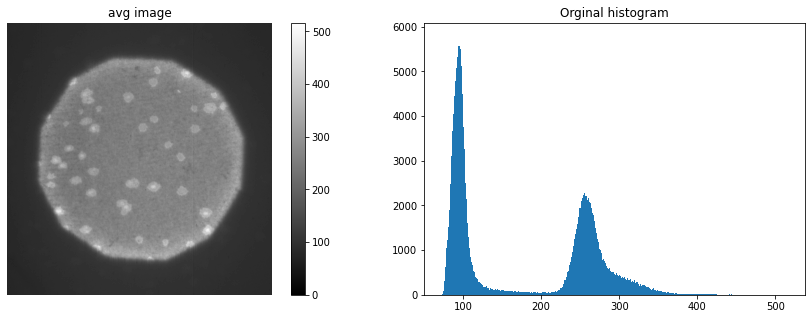

In [2]:
# Read the movie stack
stack = io.imread("data/20210928_BioAvidin_negative/movie-600-fast2.tif")[20:, 180:-110, 160:-150].astype(np.float64)

# Print the dimension of the stack
print('Data shape =',stack.shape)

# Remove the baseline
print('The baseline removed =', stack.min())
stack -= stack.min()

# display the average and it's histogram
plt.figure(figsize=(15,5))

# Average the movie
avg = np.mean(stack, axis=0)

plt.subplot(121)
plt.axis('off')
plt.title('avg image')
plt.imshow(avg, cmap = "gray", vmin=0)
plt.colorbar();

plt.subplot(122)
plt.title('Orginal histogram')
plt.hist(avg.ravel(), bins = 1000);
#plt.xlim(300,800);

### Display the Begining and the End of the stack with better contrast

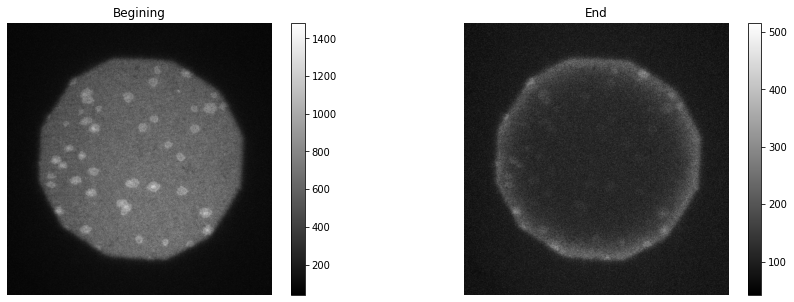

In [3]:
# display the image with better brightness and contrast
plt.figure(figsize=(15,5))

plt.subplot(121)
plt.axis('off')
plt.title('Begining')
plt.imshow(stack[:5].mean(axis = 0), cmap = "gray")
plt.colorbar();

plt.subplot(122)
plt.axis('off')
plt.title('End')
plt.imshow(stack[-5:].mean(axis = 0), cmap = "gray")
plt.colorbar();

### Measure the radius and the center on the diaphragm

In [4]:
# Getting the threshold of edge filtered image
threshold = filters.threshold_otsu(avg)

# Making a binary mask image with 0 and 1 values
mask = np.multiply(avg > threshold, 1)

# Measure the radius of the diaphragm by treating it as a circle with area = Pi*R^2
radius = int(np.sqrt(np.sum(mask)/(np.pi)))

# Measure the center of mass for the mask and transform it into integer array.
center = np.array(center_of_mass(mask)).astype(int)

print('Radius =', radius, '\nCenter =', center)

Radius = 269 
Center = [355 350]


### Display the radius and the center and the regoins of interest

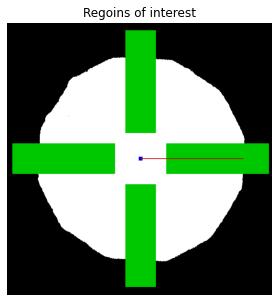

In [5]:
# Get an RGB copy of the mask
umask = np.zeros([mask.shape[0], mask.shape[1],3]).astype('uint8')
for i in range(mask.shape[0]):
    for j in range(mask.shape[1]):
        umask[i,j] = mask[i,j] * np.array([255, 255, 255])

# Draw the regions to be measured
umask[center[0]-40:center[0]+40, center[1]+int(radius/4):center[1]+int(radius*5/4)] = [0,200,0] # Rectangle right
umask[center[0]-40:center[0]+40, center[1]-int(radius*5/4):center[1]-int(radius/4)] = [0,200,0] # Rectangle left
umask[center[0]-int(radius*5/4):center[0]-int(radius/4), center[1]-40:center[1]+40] = [0,200,0] # Rectangle up
umask[center[0]+int(radius/4):center[0]+int(radius*5/4), center[1]-40:center[1]+40] = [0,200,0] # Rectangle down

# Draw the radius and the center on the mask
umask[center[0]-5:center[0]+5, center[1]-5:center[1]+5] = [0,0,200] # Center
umask[center[0]-1:center[0]+1, center[1]:center[1]+radius] = [200,0,0] # Radius

# display the image with better brightness and contrast
plt.figure(figsize=(7,5))
plt.axis('off')
plt.title('Regoins of interest')
plt.imshow(umask);